
# **DeepFace - Age, Gender, Expression, Headpose and Recognition**

---


In this lesson, we use the **DeepFace API for Age, Gender, Expression Facial and Recognition. We even use the headpose library to obtain head direction/tilt**. DeepFace is an easy to use python module that provides access to several Facial Detection and Recognition models. It's very simple to use to let's dive in.

1. Install the necessary modules and download our files
2. Demonstrate facial landmarks
3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace
4. Perform Facial Similarity
5. Perform Facial Recognition


**NOTE** Change to High-RAM setting.


## **1. Install the necessary modules and download our files**

In [1]:
!pip install deepface
!pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 10.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=2e96a963d14b61476be8825fb9a32dffb2e2d03d8058196b5b9be5d650a119dc
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


#### **Define our imshow function**

In [2]:
# Some imports and our image viewing function
import dlib
import tarfile
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [3]:
# Download facial landmarks 1CYpEuzNpsBaUJ54wVN2m3VYSh2cdTRK5
!gdown --id  1CYpEuzNpsBaUJ54wVN2m3VYSh2cdTRK5

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CYpEuzNpsBaUJ54wVN2m3VYSh2cdTRK5
To: /content/shape_predictor_68_face_landmarks.dat
100% 99.7M/99.7M [00:04<00:00, 21.2MB/s]


In [4]:
# Download our test images and a test pic
!gdown --id 1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
!unzip -q face_recognition.zip
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
To: /content/face_recognition.zip
100% 4.84M/4.84M [00:00<00:00, 14.5MB/s]
--2024-06-13 23:59:05--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/me.jpg [following]
--2024-06-13 23:59:06--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/me.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **2. Demonstrate facial landmarks**

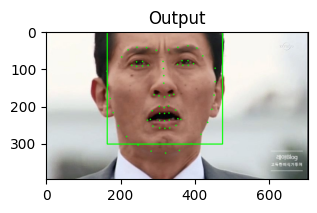

In [5]:
from imutils import face_utils

p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

image = cv2.imread('me.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get faces
rects = detector(gray, 0)

# For each detected face, find the landmark.
for (i, rect) in enumerate(rects):
    # Make the prediction and transfom it to numpy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Draw on our image, all the finded cordinate points (x,y)
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Show the image
imshow("Output", image)

## **3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace**

**Download our models**

In [6]:
!gdown --id 1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
!gdown --id 1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
!gdown --id 1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
!gdown --id 1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI

!mv facial_expression_model_weights.zip /root/.deepface/weights/facial_expression_model_weights.zip
!mv age_model_weights.h5 /root/.deepface/weights/age_model_weights.h5
!mv gender_model_weights.h5 /root/.deepface/weights/gender_model_weights.h5
!mv race_model_single_batch.zip /root/.deepface/weights/race_model_single_batch.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
To: /content/facial_expression_model_weights.zip
100% 5.54M/5.54M [00:00<00:00, 9.61MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
From (redirected): https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI&confirm=t&uuid=2cb98749-9847-4561-817f-d314d6c375dd
To: /content/age_model_weights.h5
100% 539M/539M [00:12<00:00, 43.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning

In [9]:
from deepface import DeepFace

obj = DeepFace.analyze(img_path =  "/content/me.jpg", actions = ['age', 'gender', 'race', 'emotion'])
# print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.35it/s]


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.31it/s]


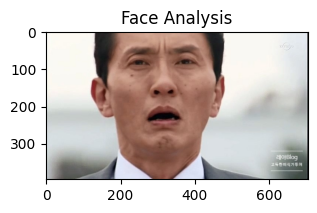

[   {   'age': 27,
        'dominant_emotion': 'surprise',
        'dominant_gender': 'Man',
        'dominant_race': 'asian',
        'emotion': {   'angry': 0.8591077197661734,
                       'disgust': 0.0007551090229993407,
                       'fear': 0.8924442210859989,
                       'happy': 0.02886654639624251,
                       'neutral': 0.36397090033788676,
                       'sad': 0.003350244115496756,
                       'surprise': 97.85150315147601},
        'face_confidence': 0.91,
        'gender': {'Man': 99.92244243621826, 'Woman': 0.07756161503493786},
        'race': {   'asian': 99.91367458268101,
                    'black': 3.969602720125084e-06,
                    'indian': 0.0014866412992496846,
                    'latino hispanic': 0.08284658366289242,
                    'middle eastern': 1.4674356813734262e-06,
                    'white': 0.0019914261984196988},
        'region': {   'h': 355,
                      'left_e

In [10]:
from deepface import DeepFace
import pprint

img_path = "/content/me.jpg"
image = cv2.imread(img_path)

obj = DeepFace.analyze(img_path = img_path,
                       actions = ['age', 'gender', 'race', 'emotion'])
imshow("Face Analysis", image)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

#### **Create a simple function to display our results on the image**

In [29]:
import cv2

def drawFace(img_path, obj):
  image = cv2.imread(img_path)
  obj = obj[0]
  x = obj['region']['x']
  y = obj['region']['y']
  h = obj['region']['h']
  w = obj['region']['w']
  age = obj['age']
  gender = obj['gender']
  gender = 'F' if gender == 'Woman' else 'M'
  dominant_emotion = obj['dominant_emotion']
  dominant_race = obj['dominant_race']
  dominant_emotion = obj['dominant_emotion']
  description = f'{age}{gender} - {dominant_emotion}'
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  cv2.putText(image, description, (x,y-10) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  cv2.putText(image, dominant_race, (x,y+h+30) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  imshow("Face Analysis", image)

#### **Test on another image**

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.42it/s]


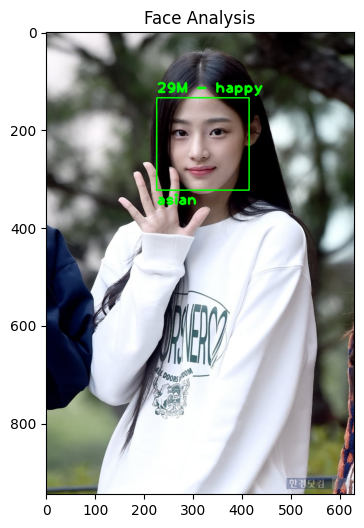

[   {   'age': 29,
        'dominant_emotion': 'happy',
        'dominant_gender': 'Man',
        'dominant_race': 'asian',
        'emotion': {   'angry': 8.247927780757891e-05,
                       'disgust': 2.1649533294559875e-10,
                       'fear': 0.002441093420202378,
                       'happy': 50.30777454376221,
                       'neutral': 49.638521671295166,
                       'sad': 0.001589963721926324,
                       'surprise': 0.04959224024787545},
        'face_confidence': 0.91,
        'gender': {'Man': 86.98292374610901, 'Woman': 13.017076253890991},
        'race': {   'asian': 99.72556827816774,
                    'black': 5.878655779509777e-06,
                    'indian': 0.21040757509515137,
                    'latino hispanic': 0.05168407532179804,
                    'middle eastern': 1.6612658906162519e-06,
                    'white': 0.012332514605280882},
        'region': {   'h': 189,
                      'left_eye

In [18]:
from deepface import DeepFace
import pprint

img_path = "/content/minji.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
drawFace(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

#### **Change backends of face detection**

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.29it/s]


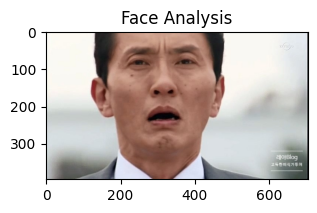

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


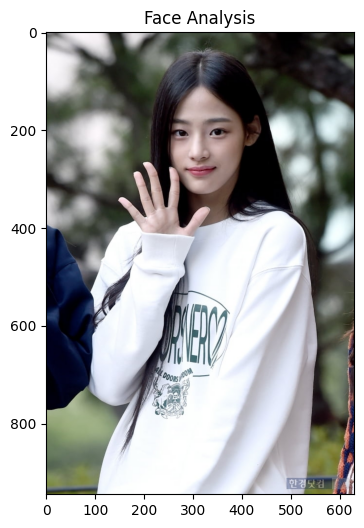

[   [   {   'age': 27,
            'dominant_emotion': 'surprise',
            'dominant_gender': 'Man',
            'dominant_race': 'asian',
            'emotion': {   'angry': 0.8591077197661734,
                           'disgust': 0.0007551090229993407,
                           'fear': 0.8924442210859989,
                           'happy': 0.02886654639624251,
                           'neutral': 0.36397090033788676,
                           'sad': 0.003350244115496756,
                           'surprise': 97.85150315147601},
            'face_confidence': 0.91,
            'gender': {'Man': 99.92244243621826, 'Woman': 0.07756161503493786},
            'race': {   'asian': 99.91367458268101,
                        'black': 3.969602720125084e-06,
                        'indian': 0.0014866412992496846,
                        'latino hispanic': 0.08284658366289242,
                        'middle eastern': 1.4674356813734262e-06,
                        'white': 0.0019914

In [31]:
from deepface import DeepFace
import pprint
import cv2

def analyze_face(img_path):
    obj = DeepFace.analyze(img_path=img_path,
                           actions=['age', 'gender', 'race', 'emotion'],
                           detector_backend='opencv',  # 기본 백엔드로 변경
                           enforce_detection=False)    # 강제 탐지를 비활성화하여 오류 방지
    return obj

# 다양한 이미지를 분석
img_paths = ["/content/me.jpg", "/content/minji.jpg"]
results = []

for img_path in img_paths:
    result = analyze_face(img_path)
    results.append(result)
    image = cv2.imread(img_path)
    imshow("Face Analysis", image)  # imshow 함수 사용
    cv2.waitKey(0)
    cv2.destroyAllWindows()

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)


## **4. Perform Facial Similarity**

In [33]:
result  = DeepFace.verify("/content/6.jpg", "/content/minji.jpg")
print("Is verified: ", result["verified"])
result

Is verified:  True


{'verified': True,
 'distance': 0.22214374973643036,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 46,
   'y': 44,
   'w': 90,
   'h': 90,
   'left_eye': (97, 74),
   'right_eye': (68, 82)},
  'img2': {'x': 226,
   'y': 134,
   'w': 189,
   'h': 189,
   'left_eye': (348, 204),
   'right_eye': (276, 207)}},
 'time': 0.27}

### **We can even use different Distance Metrics**

In [34]:
#metrics = ["cosine", "euclidean", "euclidean_l2"]

result  = DeepFace.verify("/content/6.jpg", "/content/minji.jpg", distance_metric = 'euclidean')
print("Is verified: ", result["verified"])
result

Is verified:  True


{'verified': True,
 'distance': 0.6665489475446349,
 'threshold': 1.17,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean',
 'facial_areas': {'img1': {'x': 46,
   'y': 44,
   'w': 90,
   'h': 90,
   'left_eye': (97, 74),
   'right_eye': (68, 82)},
  'img2': {'x': 226,
   'y': 134,
   'w': 189,
   'h': 189,
   'left_eye': (348, 204),
   'right_eye': (276, 207)}},
 'time': 0.3}

In [35]:
#metrics = ["cosine", "euclidean", "euclidean_l2"]

result  = DeepFace.verify("/content/6.jpg", "/content/minji.jpg", distance_metric = 'euclidean_l2')
print("Is verified: ", result["verified"])
result

Is verified:  True


{'verified': True,
 'distance': 0.6665489475446349,
 'threshold': 1.17,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean_l2',
 'facial_areas': {'img1': {'x': 46,
   'y': 44,
   'w': 90,
   'h': 90,
   'left_eye': (97, 74),
   'right_eye': (68, 82)},
  'img2': {'x': 226,
   'y': 134,
   'w': 189,
   'h': 189,
   'left_eye': (348, 204),
   'right_eye': (276, 207)}},
 'time': 0.26}

### **Download models as the existing DeepFace downloader has stopped working**

In [36]:
!gdown --id 1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1
!gdown --id 1GWIuvW3Vm3wMpGGEyTT7sU-c1cVWZIEc
!mv vgg_face_weights.h5 /root/.deepface/weights/vgg_face_weights.h5
!mv facenet_weights.h5 /root/.deepface/weights/facenet_weights.h5

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1
From (redirected): https://drive.google.com/uc?id=1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1&confirm=t&uuid=5e732ad9-adac-47a0-a05c-f892435c07ba
To: /content/vgg_face_weights.h5
100% 580M/580M [00:15<00:00, 37.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GWIuvW3Vm3wMpGGEyTT7sU-c1cVWZIEc
To: /content/facenet_weights.h5
100% 92.2M/92.2M [00:03<00:00, 23.4MB/s]


## **5. Perform Facial Recognition**

In [45]:
from deepface import DeepFace
import pandas as pd

df = DeepFace.find(img_path = "/content/minji.jpg", db_path = '/content/training_faces', detector_backend = 'ssd')
df

24-06-14 00:47:44 - Searching /content/minji.jpg in 11 length datastore
24-06-14 00:47:45 - find function duration 0.09854912757873535 seconds


[                        identity                                      hash  \
 0  /content/training_faces/6.jpg  8356576d1f79488ec043b32531a4c9fbb2df367d   
 
    target_x  target_y  target_w  target_h  source_x  source_y  source_w  \
 0        57        37        72        96       252       113       151   
 
    source_h  threshold  distance  
 0       220       0.68  0.225453  ]

In [46]:
from deepface import DeepFace
import os
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 이미지들이 저장된 폴더 경로
folder_path = './training_faces/'

# 폴더 내의 모든 이미지 파일 경로 리스트
image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png'))]

# 이미지 경로 리스트 길이
num_images = len(image_paths)

# 유사도 행렬 초기화
similarity_matrix = np.zeros((num_images, num_images))

# 모든 이미지 쌍에 대해 유사도 계산
for i in range(num_images):
    for j in range(i, num_images):
        if i == j:
            similarity_matrix[i][j] = 0  # 동일한 이미지일 경우 유사도 0
        else:
            result = DeepFace.verify(image_paths[i], image_paths[j], detector_backend='ssd', enforce_detection=False)
            similarity_matrix[i][j] = result['distance']
            similarity_matrix[j][i] = result['distance']

# 유사도 행렬을 데이터프레임으로 변환하여 보기 좋게 출력
image_names = [os.path.basename(path) for path in image_paths]
similarity_df = pd.DataFrame(similarity_matrix, index=image_names, columns=image_names)

# 결과 출력
print(similarity_df)


                      Nidia_1.jpg  Nidia_3.jpg  Nidia_6.jpg   jlo.jpg  \
Nidia_1.jpg              0.000000     0.906051     0.590170  0.680784   
Nidia_3.jpg              0.906051     0.000000     0.877410  0.929114   
Nidia_6.jpg              0.590170     0.877410     0.000000  0.888909   
jlo.jpg                  0.680784     0.929114     0.888909  0.000000   
jennifer_aniston.jpg     0.830892     0.912657     0.847959  0.824738   
me.jpg                   0.934224     0.681132     0.887975  0.922012   
6.jpg                    0.780075     0.936876     0.913972  0.757372   
Nidia_4.jpg              0.404387     0.913402     0.655927  0.745303   
ladygaga.jpg             0.843968     0.637474     0.861015  0.918329   
Nidia_5.jpg              0.524134     0.896592     0.660754  0.819292   
Nidia_2.jpg              0.883950     0.280178     0.866136  0.942671   

                      jennifer_aniston.jpg    me.jpg     6.jpg  Nidia_4.jpg  \
Nidia_1.jpg                       0.830892  

## **We can even try a few different models**

In [ ]:
# TensorFlow 버전 다운그레이드
!pip install tensorflow==2.12

# 런타임 다시 시작 필요
import os
os.kill(os.getpid(), 9)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 115.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 54.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Unins

In [1]:
from deepface import DeepFace
import pandas as pd

dfs = []
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]

for model in models:
    # DeepFace.find 함수 호출 및 반환값 확인
    results = DeepFace.find(img_path="/content/minji.jpg", db_path='/content/training_faces', model_name=model, detector_backend='ssd')

    # 반환된 결과 출력 (디버깅을 위해)
    print(f"Results for model {model}: {results}")

    # 반환된 결과가 비어있지 않은지 확인
    if results is not None and len(results) > 0:
        # 반환된 결과가 리스트인지 확인하고, 내부 데이터를 데이터프레임으로 변환
        if isinstance(results, list):
            df_list = [pd.DataFrame([entry]) if isinstance(entry, dict) else pd.DataFrame(entry) for entry in results]
            df = pd.concat(df_list, ignore_index=True)

        df['model'] = model
        dfs.append(df)

# 모든 DataFrame을 하나로 결합
if dfs:
    final_df = pd.concat(dfs, ignore_index=True)
    # 결과 출력
    print(final_df)
else:
    print("No results found.")


24-06-14 00:57:54 - Searching /content/minji.jpg in 11 length datastore
24-06-14 00:57:56 - find function duration 1.9901697635650635 seconds
Results for model VGG-Face: [                        identity                                      hash  \
0  /content/training_faces/6.jpg  8356576d1f79488ec043b32531a4c9fbb2df367d   

   target_x  target_y  target_w  target_h  source_x  source_y  source_w  \
0        57        37        72        96       252       113       151   

   source_h  threshold  distance  
0       220       0.68  0.225453  ]
24-06-14 00:57:56 - Searching /content/minji.jpg in 11 length datastore
24-06-14 00:57:59 - find function duration 2.9760186672210693 seconds
Results for model Facenet: [                        identity                                      hash  \
0  /content/training_faces/6.jpg  8356576d1f79488ec043b32531a4c9fbb2df367d   

   target_x  target_y  target_w  target_h  source_x  source_y  source_w  \
0        57        37        72        96       

Finding representations:   0%|          | 0/11 [00:00<?, ?it/s]

24-06-14 00:58:12 - VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: /root/.deepface/weights/VGGFace2_DeepFace_weights_val-0.9034.h5.zip

  0%|          | 0.00/511M [00:00<?, ?B/s]
  3%|▎         | 16.3M/511M [00:00<00:03, 161MB/s]
 13%|█▎        | 67.1M/511M [00:00<00:01, 362MB/s]
 23%|██▎       | 119M/511M [00:00<00:00, 432MB/s] 
 33%|███▎      | 168M/511M [00:00<00:00, 456MB/s]
 44%|████▎     | 223M/511M [00:00<00:00, 488MB/s]
 53%|█████▎    | 273M/511M [00:00<00:00, 490MB/s]
 63%|██████▎   | 322M/511M [00:00<00:00, 490MB/s]
 73%|███████▎  | 374M/511M [00:00<00:00, 497MB/s]
 83%|████████▎ | 425M/511M [00:00<00:00, 501MB/s]
100%|██████████| 511M/511M [00:01<00:00, 473MB/s]
Finding representations:  18%|█▊        | 2/11 [00:22<01:24,  9.38s/it]

24-06-14 00:58:23 - 🔴 Exception while extracting faces from /content/training_faces/Nidia_3.jpg: Face could not be detected in /content/training_faces/Nidia_3.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations:  64%|██████▎   | 7/11 [00:28<00:09,  2.41s/it]

24-06-14 00:58:29 - 🔴 Exception while extracting faces from /content/training_faces/Nidia_2.jpg: Face could not be detected in /content/training_faces/Nidia_2.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations: 100%|██████████| 11/11 [00:34<00:00,  3.12s/it]


24-06-14 00:58:35 - There are now 11 representations in ds_model_deepface_detector_ssd_aligned_normalization_base_expand_0.pkl
24-06-14 00:58:35 - Searching /content/minji.jpg in 11 length datastore
24-06-14 00:58:37 - find function duration 35.9246301651001 seconds
Results for model DeepFace: [                        identity                                      hash  \
0  /content/training_faces/6.jpg  8356576d1f79488ec043b32531a4c9fbb2df367d   

   target_x  target_y  target_w  target_h  source_x  source_y  source_w  \
0        57        37        72        96       252       113       151   

   source_h  threshold  distance  
0       220       0.23  0.202124  ]
24-06-14 00:58:37 - Found 11 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/11 [00:00<?, ?it/s]

24-06-14 00:58:37 - deepid_keras_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/deepid_keras_weights.h5
To: /root/.deepface/weights/deepid_keras_weights.h5

100%|██████████| 1.61M/1.61M [00:00<00:00, 39.9MB/s]
Finding representations:  36%|███▋      | 4/11 [00:02<00:02,  2.52it/s]

24-06-14 00:58:39 - 🔴 Exception while extracting faces from /content/training_faces/Nidia_3.jpg: Face could not be detected in /content/training_faces/Nidia_3.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations:  73%|███████▎  | 8/11 [00:02<00:00,  5.53it/s]

24-06-14 00:58:39 - 🔴 Exception while extracting faces from /content/training_faces/Nidia_2.jpg: Face could not be detected in /content/training_faces/Nidia_2.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations: 100%|██████████| 11/11 [00:03<00:00,  3.42it/s]


24-06-14 00:58:40 - There are now 11 representations in ds_model_deepid_detector_ssd_aligned_normalization_base_expand_0.pkl
24-06-14 00:58:40 - Searching /content/minji.jpg in 11 length datastore
24-06-14 00:58:40 - find function duration 3.3007586002349854 seconds
Results for model DeepID: [Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
Index: []]
24-06-14 00:58:40 - Found 11 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/11 [00:00<?, ?it/s]

24-06-14 00:58:41 - arcface_weights.h5 will be downloaded to /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5

  0%|          | 0.00/137M [00:00<?, ?B/s]
 18%|█▊        | 24.1M/137M [00:00<00:00, 240MB/s]
 39%|███▉      | 53.5M/137M [00:00<00:00, 269MB/s]
 62%|██████▏   | 85.5M/137M [00:00<00:00, 292MB/s]
100%|██████████| 137M/137M [00:00<00:00, 295MB/s]
Finding representations:  18%|█▊        | 2/11 [00:04<00:15,  1.68s/it]

24-06-14 00:58:44 - 🔴 Exception while extracting faces from /content/training_faces/Nidia_3.jpg: Face could not be detected in /content/training_faces/Nidia_3.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations:  82%|████████▏ | 9/11 [00:05<00:00,  3.76it/s]

24-06-14 00:58:45 - 🔴 Exception while extracting faces from /content/training_faces/Nidia_2.jpg: Face could not be detected in /content/training_faces/Nidia_2.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations: 100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


24-06-14 00:58:46 - There are now 11 representations in ds_model_arcface_detector_ssd_aligned_normalization_base_expand_0.pkl
24-06-14 00:58:46 - Searching /content/minji.jpg in 11 length datastore
24-06-14 00:58:46 - find function duration 6.631281137466431 seconds
Results for model ArcFace: [                        identity                                      hash  \
0  /content/training_faces/6.jpg  8356576d1f79488ec043b32531a4c9fbb2df367d   

   target_x  target_y  target_w  target_h  source_x  source_y  source_w  \
0        57        37        72        96       252       113       151   

   source_h  threshold  distance  
0       220       0.68  0.270221  ]
24-06-14 00:58:46 - Found 11 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/11 [00:00<?, ?it/s]

24-06-14 00:58:47 - dlib_face_recognition_resnet_model_v1.dat is going to be downloaded


Downloading...
From: http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
To: /root/.deepface/weights/dlib_face_recognition_resnet_model_v1.dat.bz2

  0%|          | 0.00/21.4M [00:00<?, ?B/s]
  2%|▏         | 524k/21.4M [00:00<00:34, 599kB/s]
  5%|▍         | 1.05M/21.4M [00:01<00:17, 1.13MB/s]
 10%|▉         | 2.10M/21.4M [00:01<00:08, 2.30MB/s]
 17%|█▋        | 3.67M/21.4M [00:01<00:04, 4.02MB/s]
 34%|███▍      | 7.34M/21.4M [00:01<00:01, 8.55MB/s]
 51%|█████▏    | 11.0M/21.4M [00:01<00:00, 12.0MB/s]
 69%|██████▊   | 14.7M/21.4M [00:01<00:00, 14.5MB/s]
100%|██████████| 21.4M/21.4M [00:02<00:00, 10.0MB/s]
Finding representations:  36%|███▋      | 4/11 [00:06<00:08,  1.16s/it]

24-06-14 00:58:52 - 🔴 Exception while extracting faces from /content/training_faces/Nidia_3.jpg: Face could not be detected in /content/training_faces/Nidia_3.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations:  73%|███████▎  | 8/11 [00:06<00:01,  2.23it/s]

24-06-14 00:58:53 - 🔴 Exception while extracting faces from /content/training_faces/Nidia_2.jpg: Face could not be detected in /content/training_faces/Nidia_2.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations: 100%|██████████| 11/11 [00:07<00:00,  1.51it/s]


24-06-14 00:58:54 - There are now 11 representations in ds_model_dlib_detector_ssd_aligned_normalization_base_expand_0.pkl
24-06-14 00:58:54 - Searching /content/minji.jpg in 11 length datastore
24-06-14 00:58:54 - find function duration 7.35061502456665 seconds
Results for model Dlib: [                              identity  \
0        /content/training_faces/6.jpg   
1  /content/training_faces/Nidia_4.jpg   
2  /content/training_faces/Nidia_1.jpg   

                                       hash  target_x  target_y  target_w  \
0  8356576d1f79488ec043b32531a4c9fbb2df367d        57        37        72   
1  992c672cbb40152de9c37d6628d14daf080a1728       321        74       167   
2  8c5eaabf7e11dfb6fc7ffaaacc233ab4d0c0f43e       136        91        63   

   target_h  source_x  source_y  source_w  source_h  threshold  distance  
0        96       252       113       151       220       0.07  0.030508  
1       246       252       113       151       220       0.07  0.062589  
2       1

Here's a great tutorial on building a MongoDB based system for facial recognition https://sefiks.com/2021/01/22/deep-face-recognition-with-mongodb/